# Seoul Bike Rental 

In [1]:
# importing libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
import statsmodels.api as sm

In [2]:
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv('SeoulBikeData.csv',encoding= 'unicode_escape',parse_dates=[0])

## Exploring Dataset

In [4]:
df.head(5)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


## Question 1: What are the factors that influence the number of bikes rented?

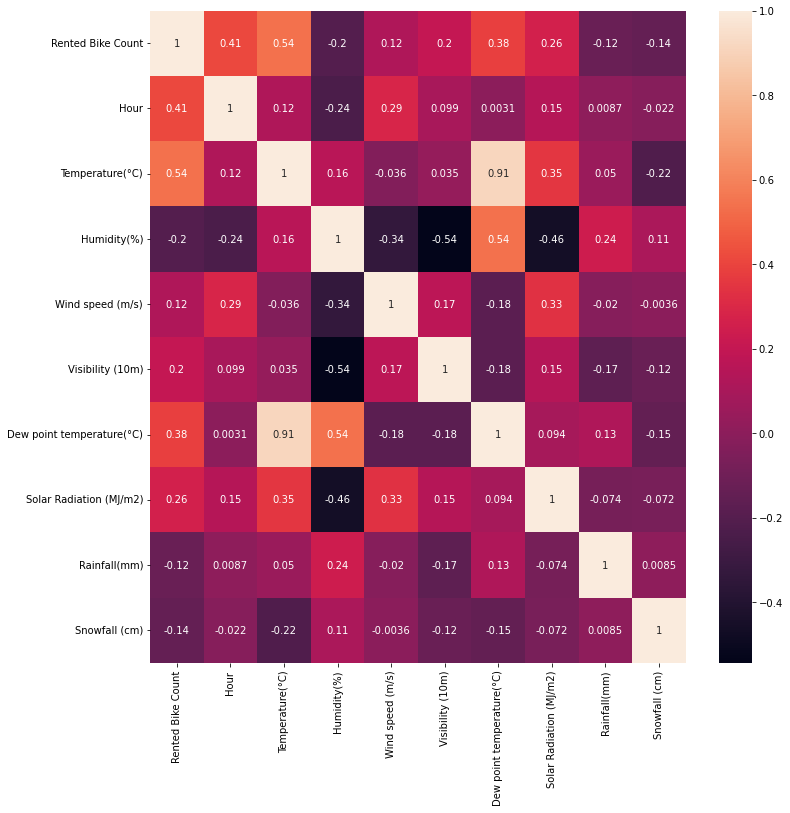

In [7]:
# plottig co-relation matrix
df_corr = df.corr()

fig, ax = plt.subplots(figsize=(12,12)) 
sns.heatmap(df_corr, annot=True)
plt.show()

#### Dew point temperature and Temperature is showing high co-linearity (0.91). It is possible to drop it. For now we are not dropping it.

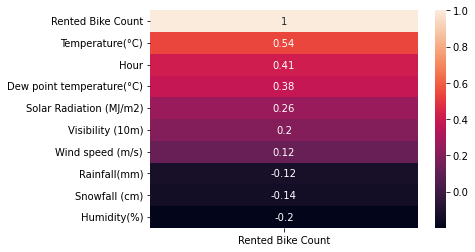

In [8]:
heatmap = sns.heatmap(df_corr[['Rented Bike Count']].sort_values(by='Rented Bike Count', ascending=False), annot=True)


### Inference: (Temperature, Hour and Dew point temperature) are the main factors that influence the bikes rented

#### ------------------------------------------------------------------------------------------------------------------------

## Question 2: Explore the data for outliers and missing values.

In [9]:
# Checking for missing values in each column

df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

<AxesSubplot:>

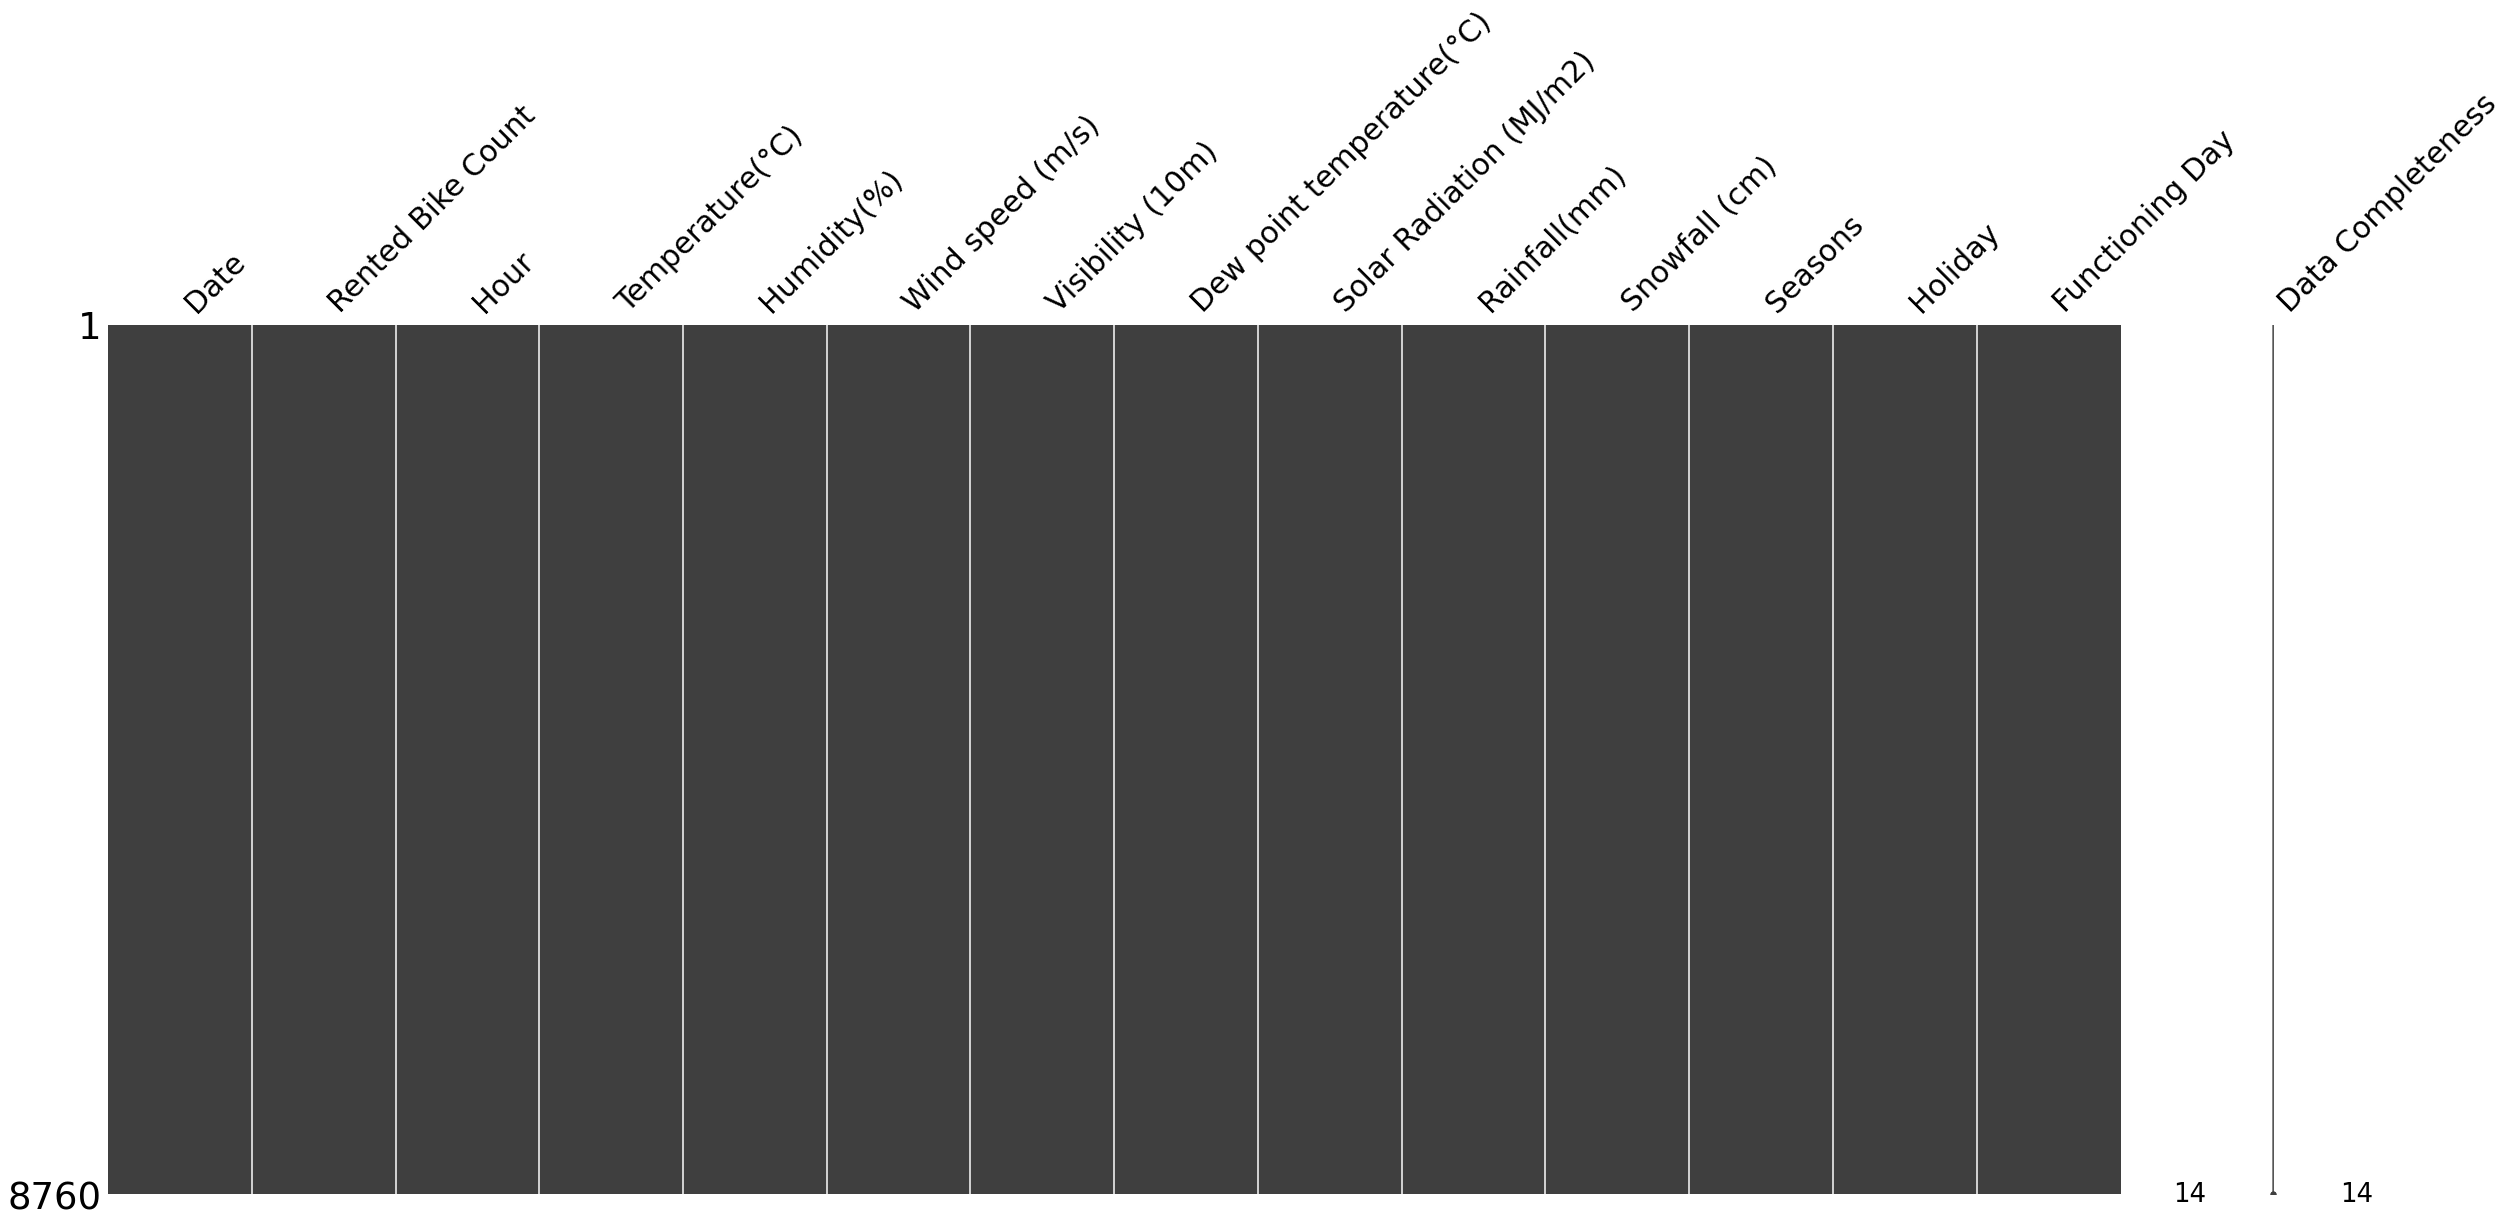

In [10]:
# Using Missing Value plot
import missingno as msno

msno.matrix(df,labels=[df.columns],figsize=(40,16),fontsize=30)

### Inference: There are no missing values in the dataset. 

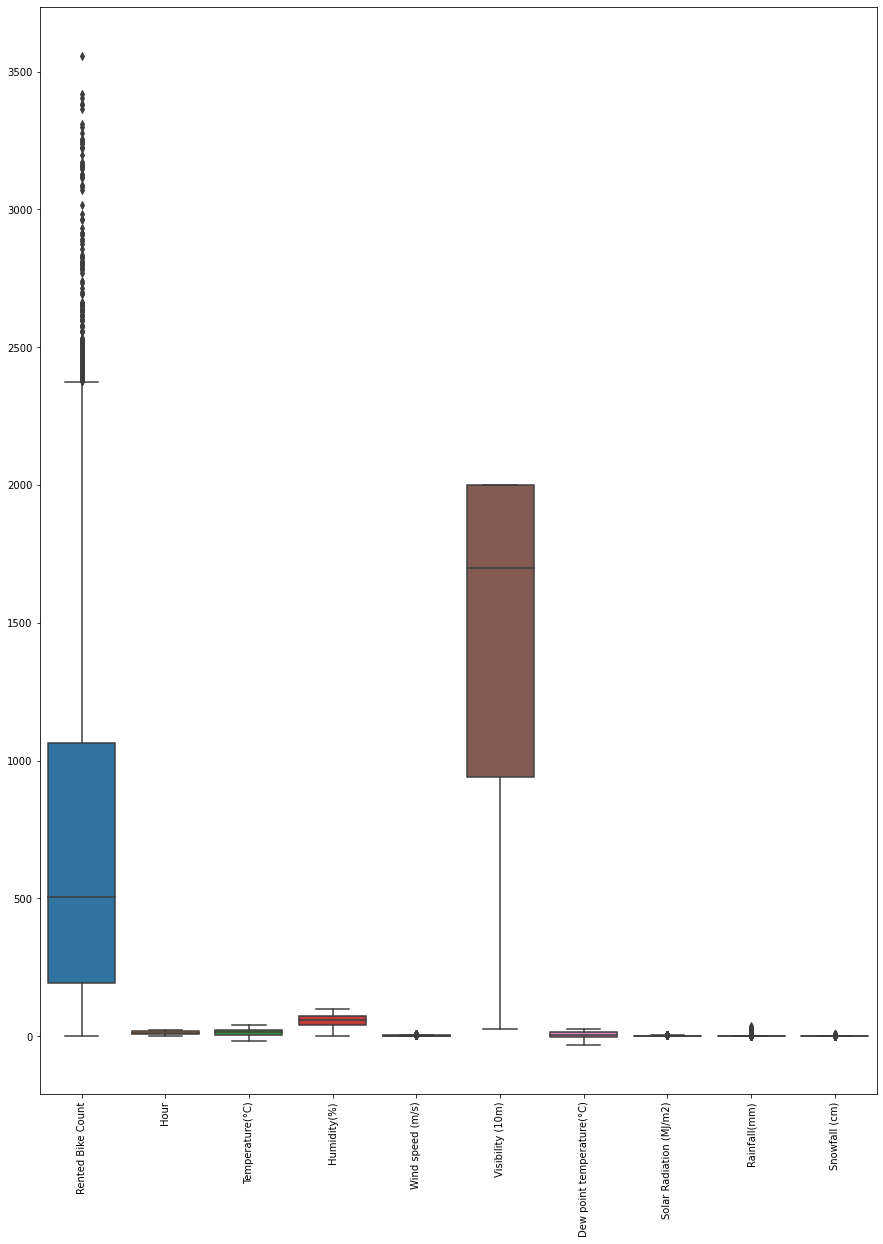

In [11]:
# using boxplot for detecting outliers.

plt.figure(figsize = (15,20))   
plt.xticks(rotation = 90)    # for better visibility 
sns.boxplot(data = df)
plt.show()

#### Inference: Only feature - Rented Bike Count shows significant outliers.

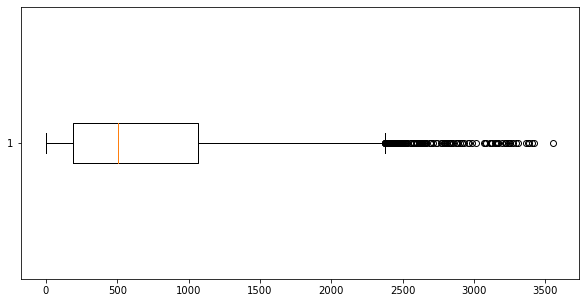

In [12]:
# ploting boxplot for Feature - Rented Bike Count

plt.figure(figsize=(10,5))
plt.boxplot(df['Rented Bike Count'],vert=False)
plt.show()

<AxesSubplot:xlabel='Rented Bike Count', ylabel='Density'>

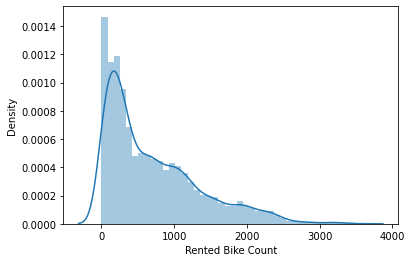

In [13]:
sns.distplot((df['Rented Bike Count']))

In [14]:
df["Rented Bike Count"].value_counts().sum()

8760

In [15]:
#selecting variables that have data types float and int.
var=list(df.select_dtypes(include=['float64','int64']).columns)

In [16]:
from sklearn.preprocessing import PowerTransformer

sc_X=PowerTransformer(method = 'yeo-johnson')
df[var]=sc_X.fit_transform(df[var])

<AxesSubplot:xlabel='Rented Bike Count', ylabel='Density'>

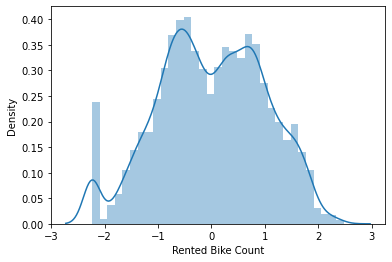

In [17]:
sns.distplot((df['Rented Bike Count']))

In [18]:
df["Rented Bike Count"].value_counts().sum()

8760

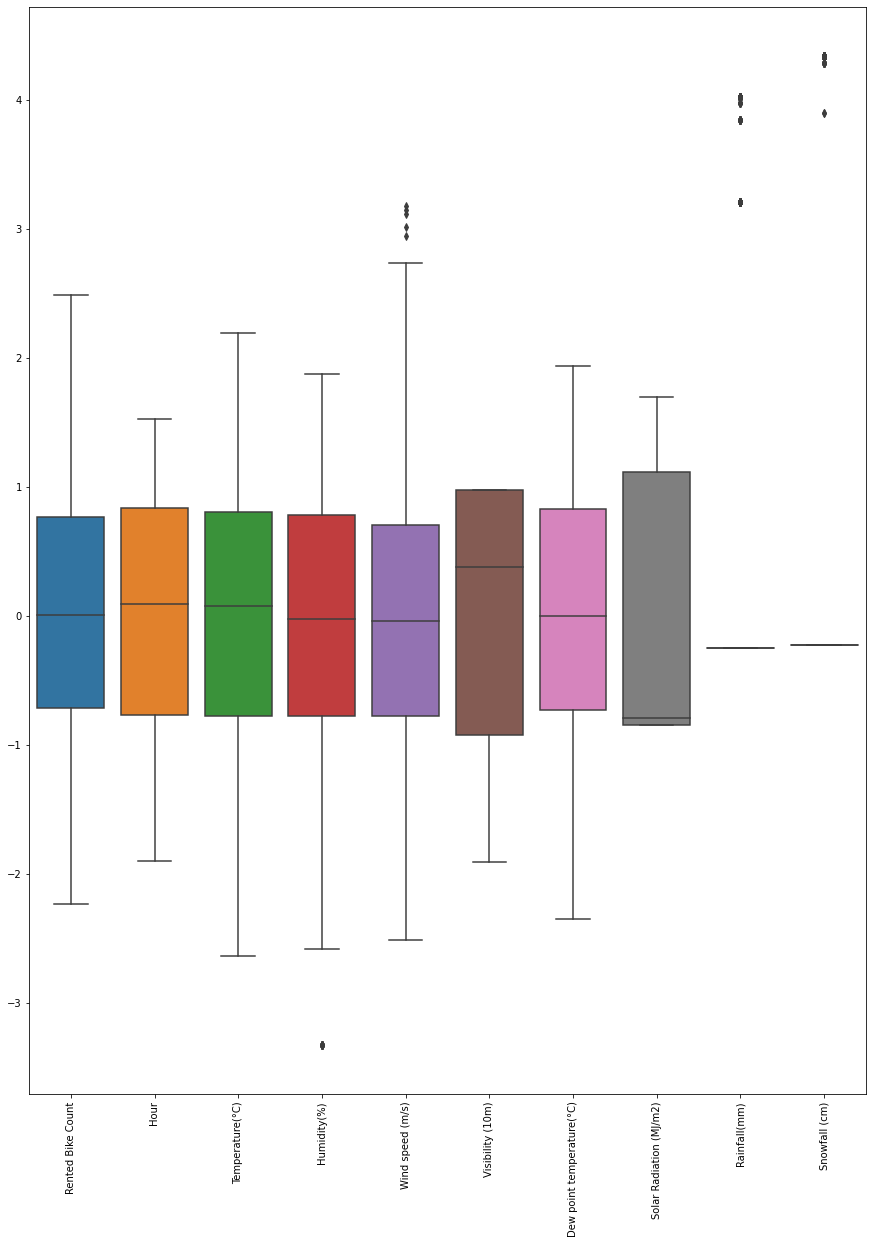

In [19]:
# using boxplot for detecting outliers.

plt.figure(figsize = (15,20))   
plt.xticks(rotation = 90)    # for better visibility 
sns.boxplot(data = df)
plt.show()

#### Inference: We can see that the few features including Rented bike count were skewed so we used power transformation on them

## Question 3: Plot the correlation between the variables and state your comments.

### Refer to Question 1

## Question 4: Build a linear regression model to predict rented bike count by choosing appropriate independent variables.

In [20]:
# Creating Dummies for Categorical Features

df=pd.get_dummies(df,columns=['Holiday','Seasons','Functioning Day','Hour'],drop_first=True)

In [21]:
# Defining Independent and Dependant Feature

X=df.iloc[:,2:] # only using relevant features and dropping date, Rented Bike Count feature
y=df.iloc[:,1] # Dependant Feature - Rented Bike Count

In [22]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression #Correlation evaluation

In [23]:
# using SelectKBest for finding most imp features

fs = SelectKBest(score_func=f_regression, k='all')
fs.fit(X, y)

SelectKBest(k='all', score_func=<function f_regression at 0x7fc2ec686700>)

In [24]:
# Feature importance Calculation

feature_contribution=(fs.scores_/sum(fs.scores_))*100

Temperature(°C) : 22.22%
Humidity(%) : 3.23%
Wind speed (m/s) : 1.07%
Visibility (10m) : 2.23%
Dew point temperature(°C) : 8.17%
Solar Radiation (MJ/m2) : 7.85%
Rainfall(mm) : 5.19%
Snowfall (cm) : 2.44%
Holiday_No Holiday : 0.48%
Seasons_Spring : 0.06%
Seasons_Summer : 6.38%
Seasons_Winter : 11.97%
Functioning Day_Yes : 12.70%
Hour_-1.6548714129993143 : 0.25%
Hour_-1.4402626210764762 : 0.84%
Hour_-1.2448659139264244 : 1.79%
Hour_-1.062615753178147 : 2.99%
Hour_-0.8902006518776767 : 2.86%
Hour_-0.725556724703515 : 1.06%
Hour_-0.5672855293241121 : 0.02%
Hour_-0.41438295457830404 : 0.43%
Hour_-0.2660965591935002 : 0.00%
Hour_-0.12184366457225562 : 0.05%
Hour_0.01883886463516997 : 0.00%
Hour_0.15632703712075513 : 0.03%
Hour_0.29093154570740787 : 0.07%
Hour_0.42291295238673404 : 0.10%
Hour_0.5524925678867186 : 0.19%
Hour_0.6798604391497868 : 0.36%
Hour_0.805181338250089 : 0.85%
Hour_0.9285993359197644 : 2.00%
Hour_1.0502413509653417 : 0.89%
Hour_1.1702199445458765 : 0.51%
Hour_1.2886355482

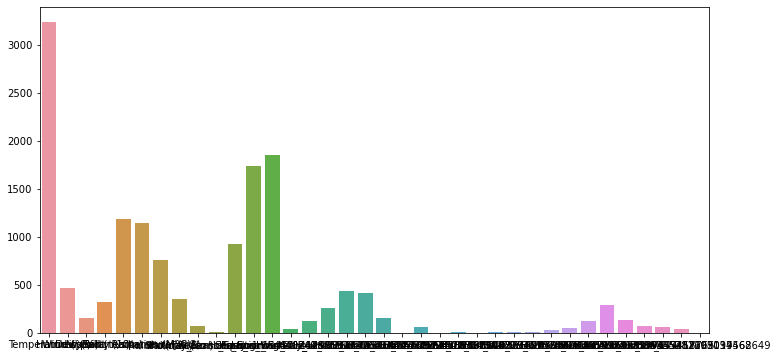

In [25]:
# plotting feature importance

for i,j in enumerate(X.columns):
    print(f'{j} : {feature_contribution[i]:.2f}%')
plt.figure(figsize=(12,6))
sns.barplot(x=X.columns,y=fs.scores_)
plt.show()

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
# Splitting Dataset into test and train

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=0)

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
# Using Standard Scaler for improving accuracy further

sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [30]:
# Importing Regression models

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [31]:
# Building Linear Regression Model
model=LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

# Performance Evaluations
print(f"Model R-Square : {r2_score(y_test,y_pred)*100:.2f}%")
print(f"Model MSE : {mean_squared_error(y_test,y_pred)*100:.2f}%")

Model R-Square : 80.83%
Model MSE : 19.10%


### Inference: We started with accuracy of 49% an drastically improved the score to ~81%. We have a proper fit of the data and results are reliable.